# Simulating microscope

Initial setup of the microsope and view of its acquisition details.

In [5]:
%reload_ext autoreload
import matplotlib
%matplotlib inline
import mayavi.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import time
from scipy.spatial.transform import Rotation as R
from ipywidgets import interact

from fpmsample.simicro import SimMicroscope
from fpmsample import math
from phaseopt import data
from phaseopt import math as phasemath

mlab.init_notebook()
cfg = data.cfg_load()
sm = SimMicroscope(cfg=cfg)
sm.details()

Notebook initialized with x3d backend.
Original size: 300
Pupil radius: 29 pixels
mk: 5, patch size: 60
Max phi given by NA_syn: 23.6
Total simulated samples: 25


Generation of the matrix of illumination and the simplified microscope setup.

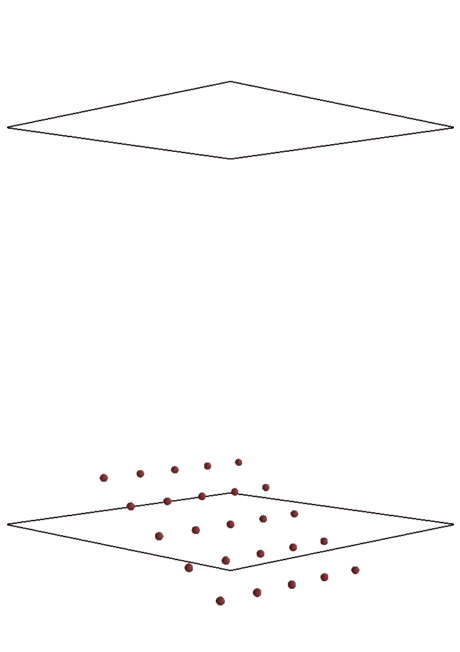

In [8]:
height = sm.height
size = sm.array_size
max_index = int((size-1)//2)
gap = sm.led_gap
x0, y0 ,z0 = [0, 0, 0]
xs, ys, zs = [0, 0, -height]
psi, phi, theta = [0, 30, 0]
offset = np.array([0, 0, -height])
r = R.from_euler('zyx', [psi, phi, theta], degrees=True)
x, y = np.mgrid[-max_index:max_index+1:1, -max_index:max_index+1:1]*gap
# Applying the rotation
coordinate_grid = np.array([x, y, np.zeros_like(x)])
rotated_vectors = r.apply(coordinate_grid.transpose().reshape(-1, 3))+offset
rotated_vectors = rotated_vectors.transpose()

mlab.figure(size=(700,1000), bgcolor=(1, 1, 1))
mlab.points3d(x0, y0, z0, 1, colormap="hot", mode='2dsquare', scale_factor=40, vmin=1, vmax=3)
mlab.points3d(xs, ys, zs, 1, colormap="hot", mode='2dsquare', scale_factor=40, vmin=1, vmax=3)
camview = mlab.view(azimuth=-45, elevation=90, distance=150)
mlab.points3d(rotated_vectors[0], rotated_vectors[1], rotated_vectors[2], scale_factor=1, color=(.5, .2, .2))
#mlab.quiver3d(0, 0, 0, n[0], n[1], n[2])
mlab.view(*camview)

# Simulation parameters
arr = mlab.screenshot(antialiased=True)
mlab.show()
fig, ax = plt.subplots(1,1, figsize=[8, 16])
ax.imshow(arr,  interpolation="bilinear")
ax.axis('off')
mlab.close()

In [11]:
def set_setup(height, na):
    """ Sets up the scene.
    """
    tan_theta = na/(np.sqrt(1-na**2)) # sin/cos
    na_radius = tan_theta*height
    x0, y0 ,z0 = [0, 0, 0]
    xs, ys, zs = [0, 0, -height]
    mlab.figure(size=(600,600), bgcolor=(1, 1, 1))
    mlab.points3d(x0, y0, z0, 1, colormap="hot", mode='2dsquare', scale_factor=40, vmin=1, vmax=3)
    mlab.points3d(xs, ys, zs, 1, colormap="hot", mode='2dsquare', scale_factor=40, vmin=1, vmax=3)
    camview = mlab.view(azimuth=-45, elevation=70, distance = 100)
    fig = mlab.gcf()
    return fig, camview

def plot_source(position, direction, camview, color='None', fig='None'):
    x, y ,z = position
    u, v, w = direction
    value = 1.2
    mlab.points3d(x, y, -z, value, color=(.1, .1, 1), mode='sphere', scale_factor=2, vmin = 2, vmax = 3, figure=fig)
    mlab.view(*camview)
    return

def plot_matrix_plane(camview, height, theta1, theta2, theta3):
    size = 2
    offset = np.array([0, 0, 0])
    r = R.from_euler('zyx', [theta1, theta2, theta3], degrees=True)
    x, y = np.mgrid[-size:size:1, -size:size:1]*6
    coordinate_grid = np.array([x, y, np.zeros_like(x)])
    rotated = r.apply(coordinate_grid.transpose().reshape(-1, 3))
    rotated = rotated.transpose()
    mlab.points3d(rotated[0], rotated[1], rotated[2], scale_factor=1, color=(.5, .2, .2))
    #mlab.quiver3d(0, 0, 0, n[0], n[1], n[2])
    mlab.view(*camview)
    return

# Simulation parameters
def f(theta1, theta2, theta3):
    fig, camview = set_setup(30, sm.na)
    plot_matrix_plane(camview, 10, theta1, theta2, theta3)
    arr = mlab.screenshot()
    mlab.show()
    fig, ax = plt.subplots(1,1, figsize=[8, 12])
    ax.imshow(arr)
    ax.axis('off')
    mlab.close()
maxang = 30
lims = (-maxang,maxang, 5)
interact(f, theta1=lims, theta2=lims, theta3=lims);
#mlab.show()


interactive(children=(IntSlider(value=0, description='theta1', max=30, min=-30, step=5), IntSlider(value=0, de…

In [6]:
size = 3
r = R.from_euler('zyx', [0, 0, 0], degrees=True)
x, y = np.mgrid[-size:size:1, -size:size:1]
coordinate_grid = np.array([x, y, np.zeros_like(x)])
rotated = r.apply(coordinate_grid.transpose().reshape(-1, 3))
z = rotated
#z = (-n[0]*x-n[1]*y-d)*1/n[2]
o = rotated.transpose()

In [133]:
normal_vector = np.array([0,0,1])
offset = np.array([1, 2, 3])
normal_vector = rot_mat@normal_vector
d = -offset.dot(normal_vector)
# calculate corresponding z
z = (-normal_vector[0] * x - normal_vector[1] * y - d) * 1. /normal_vector[2]

In [29]:
centers = [(0, 0), (2, 2), (6, 2)]
r = R.from_euler('zyx', [10, 10, 20], degrees=True)
# Applying the rotation
centers = np.array([(0, 0), (2, 2), (6, 2)])
n = len(centers)
coordinate_grid = np.hstack((centers, np.zeros((n,1)) ))
rotated_vectors = r.apply(coordinate_grid.transpose().reshape(-1, 3))
rotated_vectors = rotated_vectors.transpose()
print(rotated_vectors)

[[ 6.99868923e-01  5.27621201e-03  0.00000000e+00]
 [-1.90737715e-01  1.15655864e+00  0.00000000e+00]
 [ 6.28281805e+00  2.58115173e+00  0.00000000e+00]]


In [20]:
centers = np.array([(0, 0), (2, 2), (6, 2)])
n = len(centers)
print(np.hstack((centers, np.zeros((n,1)) )))

[[0. 0. 0.]
 [2. 2. 0.]
 [6. 2. 0.]]


In [27]:
offset = np.array([1, 1])
np.append(offset, 0)

array([1, 1, 0])